<a href="https://colab.research.google.com/github/KIVILCIIM/Data-Science/blob/main/Derin_%C3%96%C4%9Frenme_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Evrişimsel Sinir Ağları**

Evrişimsel sinit ağlarının ne olduğunu öğrenmeden önce veri setimizi içe aktaralım

In [1]:
# Evrişimsel Sinir Ağları Kütüphaneler
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#gereksiz uyarıları kapatalım
import warnings
warnings.filterwarnings("ignore")

In [3]:
# veriyi içe aktaralaım
veri = pd.read_csv("/content/drive/MyDrive/BTK/DATASET/egitim.csv")
print("Verinin boyutu: ",veri.shape) # 28*28 pixel düzleştirilmiş resim 784 sütundan oluşuyor, 785. sütunda etiketler var
veri.head()

Verinin boyutu:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Label'ları ayıralım
Y_veri=veri["label"]
# x eğitim veri setini oluşturalım
X_veri = veri.drop(["label"], axis=1)
print("X veri: ", X_veri.shape)
print("Y,veri: ", Y_veri.shape)

X veri:  (42000, 784)
Y,veri:  (42000,)


In [7]:
Y_veri = Y_veri.astype("category")


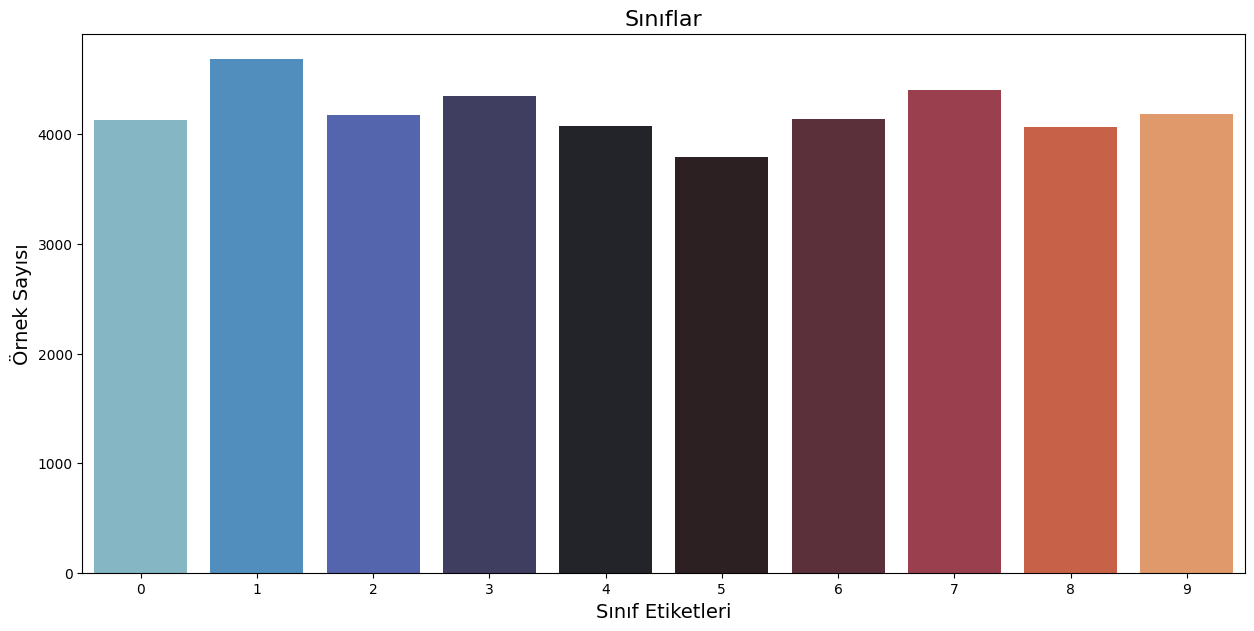

Sınıflar ve örnek sayıları:
label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Örnek sınıf bilgileri (Y_veri'nin doğru formatta olduğunu varsayıyoruz)
plt.figure(figsize=(15, 7))

# Countplot
g = sns.countplot(x=Y_veri, palette="icefire")

# X eksenine tüm sınıfları ekle
g.set_xticks(range(10))  # Eğer 0-9 sınıfları eksikse bu satırı ekleyin
g.set_xticklabels(range(10))  # 0-9 etiketlerini göster

plt.title("Sınıflar", fontsize=16)
plt.xlabel("Sınıf Etiketleri", fontsize=14)
plt.ylabel("Örnek Sayısı", fontsize=14)
plt.show()

# Value counts ile kontrol et
print("Sınıflar ve örnek sayıları:")
print(Y_veri.value_counts())


Veriler çok da dengesiz değil. Genel olarak yakın sayıda örnek var.

In [10]:
# resim boyutunu kullanacağız
resim_boyutu = int(np.sqrt(X_veri.shape[1]))
resim_boyutu

28

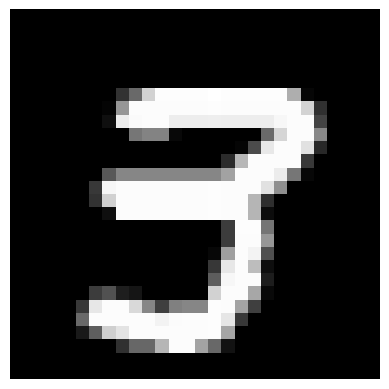

In [11]:
# veride bulunan 3 sınıfı da görselleştirelim
# burada düzleştirimiş olan veriyi yeniden görselleştireceğiz
resim1 = X_veri.iloc[2000].values #indeks'i 2000 olan değere bakıyoruz
resim1 = resim1.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim1,cmap="gray")
plt.axis("off")
plt.show()

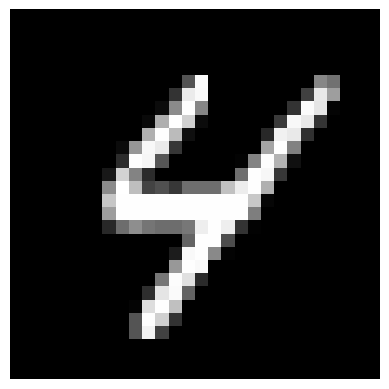

In [12]:
# verileri görselleştirelim 4 sınıfı
resim2 = X_veri.iloc[19000].values #indeks'i 2000 olan değere bakıyoruz
resim2 = resim2.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim2,cmap="gray")
plt.axis("off")
plt.show()

**Normalleştirme, Yeniden Şekillendirme ve Etiket Kodlama**

*Normalleştirme:*

  Aydınlatmanın farklılıklarının etkisini azaltmak için gri tonlamalı normalleştirme yapıyoruz.

  Normalleştirme yapıldığı durumda modelimiz daha hızlı çalışır.

*Yeniden şekillendirme:*

  Tüm verileri 28x28x1 3B matrislere yeniden şekillendiriyoruz. Çünkü keras girdi olarak 3B veri kabul ediyor.

   Keras'ın sonnda kanallara karşılık gelen ekstra bir boyuta ihtiyacı vardır. Görsellerimiz gri ölçeklidir., bu nedenle yalnızca bir kanal kullanılır.

Etiket kodlama:

   Etiketleri Tek vektör olarak kodlayalım
   2 => [0,0,0,0,1,0,0,0,0,0}


In [13]:
# Normalize the data
X_veri = X_veri / 255.0

In [15]:
#Reshape
X_veri = X_veri.values.reshape(-1,28,28,1)
print("X eğitim boyut: ", X_veri.shape)

X eğitim boyut:  (42000, 28, 28, 1)


In [20]:
#etiket kodlama
from tensorflow.keras.utils import to_categorical  # Doğru modül

# One-hot encoding için num_classes belirtimiyle kullanım
Y_veri = to_categorical(Y_veri, num_classes=10)

print("One-hot encoded etiketler:")
print(Y_veri)


One-hot encoded etiketler:
[[[1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0.

**Eğitim Test Bölünmesi**

test = %10 ve eğitim = %90

In [24]:
#Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_egitim, X_test, Y_egitim, Y_test = train_test_split(X_veri, Y_veri, test_size=0.1, random_state=2)

print("X eğitim boyu",X_egitim.shape)
print("X Test boyu",X_test.shape)
print("Y Eğitim boyu", Y_egitim.shape)
print("Y Test boyu",Y_test.shape)

X eğitim boyu (37800, 28, 28, 1)
X Test boyu (4200, 28, 28, 1)
Y Eğitim boyu (37800, 10, 10)
Y Test boyu (4200, 10, 10)
